In [17]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import copy

**a) Calcular el ancho de cada intervalo**  

Dividimos el intervalo $[0, 2]$ en $n$ subintervalos de igual longitud:

$$
\Delta x = \frac{2 - 0}{n} = \frac{2}{n}
$$

**b) La suma de puntos nodales**
El area correponde a la base por la altura, es decir el inteverlao $\Delta x$ por el valor de altura en el punto seleccionado $f(x)$.

$$
A=\Delta x f(x)
$$

La suma de Riemann por la izquierda se define como:

$$
I = \sum_{i=0}^{n-1} f(x_i) \Delta x
$$

donde los puntos de la izquierda son estan dados por:
$$
x_i=a+i\Delta x
$$

Dado que $a=0$
$$
x_0 = 0, \quad x_1 = \frac{2}{n}, \quad x_2 = \frac{4}{n}, \quad \ldots, \quad x_{n-1} = \frac{2(n-1)}{n}.
$$

**c) Valores de la función en los puntos nodales**
$$
f(x_0)=0, \quad f(x_1)=\left(\frac{2}{n}\right)^3, \quad f(x_2)=\left(\frac{4}{n}\right)^3, \quad f(x_n)=\left(\frac{2(n-1)}{n}\right)^3
$$
Dado que en $i=0$ la sustinción para $x_0=0$ se sutituye con $i=1$, por ende al remplazar $f(x) = x^3$ y $\Delta x = \frac{2}{n}$, tenemos:

$$
I = \sum_{i=0}^{n-1} \left(\frac{2i}{n}\right)^3 \frac{2}{n}
$$

Desarrollando la expresión:

$$
I = \frac{2}{n} \sum_{i=0}^{n-1} \frac{8i^3}{n^3} = \frac{16}{n^4} \sum_{i=0}^{n-1} i^3
$$

Usamos la fórmula para la suma de los cubos:

$$
\sum_{i=0}^{n-1} i^3 = \left(\frac{(n-1)n}{2}\right)^2
$$

Por lo tanto:

$$
I = \frac{16}{n^4} \left(\frac{(n-1)n}{2}\right)^2
$$

**d) Demostrar una forma de la expresión**
$$
I = \frac{16}{n^2} \left(\frac{(n^2-2n+1)}{4}\right)
$$

$$
I = \frac{4}{n^2} (n^2-2n+1)
$$

$$
I = 4-\frac{8}{n}+ \frac{4}{n^2}
$$

$$
I = 4\left(1-\frac{2}{n}+ \frac{1}{n^2}\right)
$$

Esta expresión representa la suma de Riemann por la izquierda para $n$ subintervalos. A medida que $n$ tiende a infinito, esta suma se aproxima a la integral de $0$ a $2$ de la función $x^3$.

Siendo así se obtiene que el area corresponde a:
$$\lim_{n\rightarrow\infty}\frac{16}{n^4} \left(\frac{(n-1)n}{2}\right)^2 = 4$$

**e) Encontrar la sumatoria para n=30**

In [2]:
f=lambda x: x**3

def suma_riemman(f,a,b,n):
    x_delta=(b-a)/n
    suma=0

    for i in range(0,n):
        x_i=a+i*x_delta
        suma+=f(x_i)*x_delta

    return suma

suma_riemman(f,0,2,30)

3.7377777777777776

La sumatoria es $I=3.737777$ debido a las pocas divisiones del intervalor mediante $n$ al aumentar este se acerca cada vez más al valor real

In [3]:
x=np.linspace(30,400,100, endpoint = False)
x[2]

37.4

**f) Dibuje el error de la estimación**

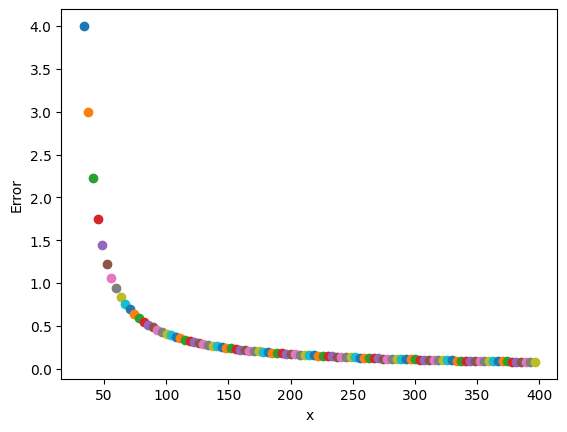

In [4]:
I=lambda x: (x**4)/4
a=0
b=2
def error_extimacion(I,f,a,b):
    x=np.linspace(30,400,100, endpoint = False)
    integral=I(b)-I(a)
    for n in range (1,len(x)):
        estimado=suma_riemman(f,a,b,n)
        error=np.abs(integral-estimado)
        plt.scatter(x[n],error)
        plt.xlabel("x")
        plt.ylabel("Error")

error_extimacion(I,f,a,b)

**g) Es la suma de Riemmann una buena estrategía para estimar integrales?**  

La suma de Riemann es una estrategia básica para aproximar el valor de una integral definida, basada en dividir el intervalo de integración en subintervalos y evaluar la función en puntos específicos dentro de esos subintervalos, aunque es fácil de entender y aplicar, puede requerir un gran número de subintervalos para obtener una buena precisión, especialmente para funciones complejas. Por otro lado, la cuadratura de Gauss es una técnica más eficiente que selecciona cuidadosamente los puntos de evaluación y sus pesos para maximizar la precisión con un número fijo de evaluaciones. A diferencia de la suma de Riemann, los nodos de la cuadratura de Gauss no son equidistantes, lo que permite capturar mejor el comportamiento de la función y alcanzar una mayor precisión con menos puntos. Por tanto, aunque la suma de Riemann es útil para introducir el concepto de integración, la cuadratura de Gauss es superior para aplicaciones que requieren precisión.

**24. Mejor inversión**

In [5]:
#Vector de cuotas
C=np.array([8.51, 10.68, 12.24, 13.66, 15.37, 17.15, 19.66, 24.69])
#Capital inicial
C_a=1000000

In [6]:
def Plotter(e):

  fig = plt.figure(figsize=(5,5))
  ax = fig.add_subplot(111)
  ax.set_title('Epoch: {:.0f}'.format(e),fontsize=10)

  return fig,ax


In [12]:
def retorno_min(w, C, Ca):
    R=Ca*(w* C - 1)
    return np.min(R)

F=np.array([C[0],C[1]])
w=np.array([0.5,0.5])

retorno_min(w,F,C_a)

3255000.0

In [18]:
class Robot:
    def __init__(self, f,cuotas, Id=0):
        self.Id = Id
        self.f = f
        self.cuotas = cuotas

        self.r = np.random.uniform(0, 1, size=self.cuotas.shape[0])
        self.r = self.r / np.sum(self.r)

    def GetR(self):
        return self.r

    def Mutate(self):
        self.r += np.random.normal(loc=0, scale=0.02, size=self.cuotas.shape[0])
        self.r = np.abs(self.r)
        self.r = self.r / np.sum(self.r)

    def SetFitness(self):
        h = 1e-2
        derivada = (self.f(self.r + h, self.cuotas, C_a) - self.f(self.r - h, self.cuotas, C_a)) / (2 * h)
        self.fitness = np.abs(derivada) + 0.1

    @property
    def Fitness(self):
      return self.fitness

    def __repr__(self):
      return f"Robot {self.Id}"

In [19]:
def GetRobots(N):

    Robots = []

    for i in range(N):
        r = Robot(retorno_min, C,i)
        Robots.append(r)

    return Robots

KeyboardInterrupt: 

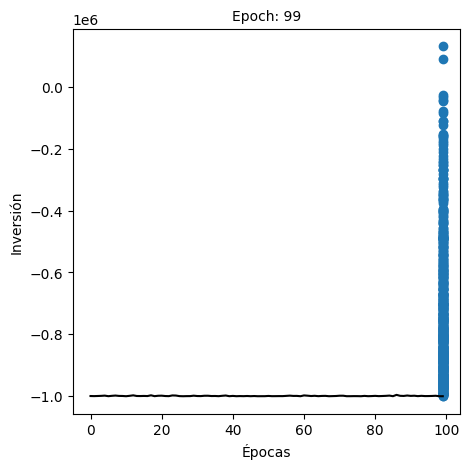

In [25]:
def Genetic(Robots, epochs=500):
    N = int(0.9 * len(Robots))
    history = []
    best_returns = []

    for e in range(epochs):
        clear_output(wait=True)
        _, ax = Plotter(e)

        for i, p in enumerate(Robots):
            p.Mutate()

        epoch_values = []
        for p in Robots:
            weights = p.GetR()
            return_value = retorno_min(weights, C, C_a)
            epoch_values.append(return_value)

        history.append(epoch_values)
        best_returns.append(np.min(epoch_values))
        ax.scatter([e] * len(Robots), epoch_values, marker='o')

        ax.plot(range(e + 1), best_returns, color='black', label=f'Return: {best_returns[-1]:.2f}')

        ax.set_xlabel("Épocas")
        ax.set_ylabel("Inversión")

        if e == epochs - 1:
            ax.legend()

        plt.pause(0.1)
        plt.show()

        print(f"Epoch {e+1}/{epochs} - Mejor retorno: {best_returns[-1]:.2f}")

Robots = GetRobots(500)
Genetic(Robots)
